## ANN

### Code

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
train_data_dir = '/content/drive/MyDrive/SAWI/train'
test_data_dir = '/content/drive/MyDrive/SAWI/valid'

Mounted at /content/drive


In [ ]:
train_datagen = ImageDataGenerator (rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator (rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size= (64, 64),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 800 images belonging to 2 classes.
Found 199 images belonging to 2 classes.


In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense (128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid') # Output 1 neuron karena ini masalah klasifikasi biner
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit (train_generator, epochs=5, validation_data=test_generator)

Epoch 1/5
25/25 [==============================] - 578s 23s/step - loss: 1.0856 - accuracy: 0.5562 - val_loss: 0.6942 - val_accuracy: 0.5377
Epoch 2/5
25/25 [==============================] - 18s 729ms/step - loss: 0.5279 - accuracy: 0.7412 - val_loss: 0.8052 - val_accuracy: 0.5126
Epoch 3/5
25/25 [==============================] - 18s 732ms/step - loss: 0.4926 - accuracy: 0.7387 - val_loss: 0.6131 - val_accuracy: 0.7085
Epoch 4/5
25/25 [==============================] - 18s 738ms/step - loss: 0.4233 - accuracy: 0.8188 - val_loss: 0.5600 - val_accuracy: 0.6935
Epoch 5/5
25/25 [==============================] - 20s 821ms/step - loss: 0.3882 - accuracy: 0.8350 - val_loss: 0.6364 - val_accuracy: 0.6181


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'\nAkurasi pengujian: {test_acc}')

7/7 [==============================] - 4s 487ms/step - loss: 0.6364 - accuracy: 0.6181

Akurasi pengujian: 0.6180904507637024


In [ ]:
def predict(image_path):
#Praproses gambar untuk memenuhi input model
  img = image.load_img(image_path, target_size=(64, 64)) # Sesuaikan dengan ukuran target model
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0 # Normalisasi nilai piksel ke rentang 0-1

  # Lakukan prediksi menggunakan model p
  prediction = model.predict(img_array)

  # Interpretasikan hasil prediksi
  if prediction[0][0] > 0.5:
      print('Prediksi: Terkena Hama')
  else:
      print('Prediksi: Tidak terkena Hama')

#Path gambar yang ingin diprediksi
image_path = test_data_dir + '/Data Sawi Ada Hama/103.png'  # Ganti dengan path gambar yang ingin diprediksi
predict(image_path)

image_path = test_data_dir + '/Data Sawi Tanpa Hama/103.png'  #Ganti dengan path gambar yang ingin diprediksi
predict(image_path)

1/1 [==============================] - 0s 116ms/step
Prediksi: Terkena Hama
1/1 [==============================] - 0s 19ms/step
Prediksi: Terkena Hama


### Analisis
> Dapat dilihat berdasarkan dengan data yang telah kita sambungkan dengan google drive dan diakses dengan path, lalu terdapat persiapan data dengan augmentasi gambar dan terlihat bahwa terdapat 800 gambar yang ada di 2 kelas train dan ada 199 gambar yang ada di kelas test.

> Setelah itu dibangun model ANN sederhana, dan dilakukan kompilasi model dengan optimizeer, loss function dan metrics yang sesuai, Lalu model tersebut akan di latih, dan dilakukan evaluasi model dan berdasarkan hasil akurasi pengujian didapatkan hasil sebesar 0.6180904507637024. Hasil tersebut dapat dibilang cukup besar untuk performa menggunakan model ANN.

> Setelah itu dilakukan prediksi menggunakan model dengan mendefinisikan fungsi predict. Dengan hasil prediksi ada yang tidak terkena hama dan ada yang terkena hama. Jika prediksi lebih besar dari 0.5 maka sawi terkena hama, dan jika prediksi lebih kecil dari 0.5 maka sawi tidak terkena hama.

### Flowchart
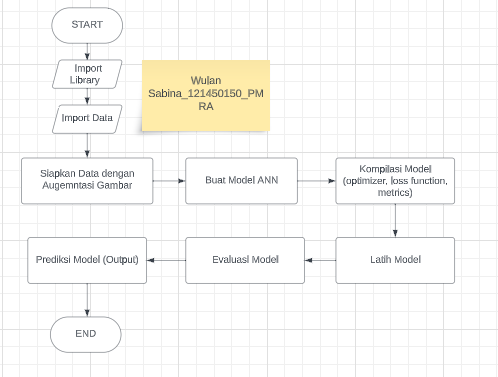

### Pseudocode
````
MULAI

Artificial Neural Network <- Judul

IMPORT -> Library
numpy
tensorflow
google.colab

INPUT -> Data
Path Google Drive (/content/drive/MyDrive/SAWI/)
READ -> Data

INISIALISASI -> Augmentasi Gambar
train_datagen
test_datagen
train_generator
test_generator
(variabel tersebut berisikan fungsi untuk persiapan data dengan gambar, seperti ukuran, zzom range, class mode, dsb)

INISIALISASI -> Model ANN
model
(berisikan layer yang ada di dalam model ANN)

INISIALISASI -> Compile Model
(berisikan optimizer, loss, metrics)

INISIALISASI -> Latih Model
model fit
(berisikan tran_generator, dengan epochs sebanyak 5, dan validation_data = test_generator)

INISIALISASI -> Evaluasi Model
test_loss
test_acc
OUTPUT -> Akurasi Pengujian (test_acc)

INISIALISASI -> Prediksi
Definisikan Fungsi -> Predict dengan parameter image_path
(terdapat praproses gambar untuk memenuhi input model dengan menyesuaikan ukuran dan di normalisasi nilai pixel nya)
(terdapat prediksi, dan interpretasi nya)
(terdapat p ath gambar yang ingin diprediksi. Yaitu Data dari SAWI (Ada/Tidak Hama)
OUTPUT -> Hasil Prediksi (Terkena Hama/ Tidak)

SELESAI
````

## CNN

In [ ]:
#import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path_with_pest = '/content/drive/MyDrive/SAWI/valid/Data Sawi Ada Hama'
path_without_pest = '/content/drive/MyDrive/SAWI/valid/Data Sawi Tanpa Hama'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load data files
pest_files = os.listdir(path_with_pest)
print(pest_files[0:5])
print(pest_files[-5:])

nopest_files = os.listdir(path_without_pest)
print(nopest_files[0:5])
print(nopest_files[-5:])

print(f'Number of with pest images: {len(pest_files)}')
print(f'Number of without pest images: {len(nopest_files)})')

['13.png', '12.png', '117.png', '10.png', '101.png']
['153.png', '164.png', '155.png', '18.png', '181.png']
['102.png', '114.png', '104.png', '128.png', '127.png']
['138.png', '145.png', '159.png', '187.png', '18.png']
Number of with pest images: 99
Number of without pest images: 100)


In [ ]:
pest_files = [1]*len(pest_files)
nopest_files = [0]*len (nopest_files)
print(pest_files[0:5]),print(nopest_files[0:5])
print(len(pest_files)),print(len(nopest_files))

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
99
100


(None, None)

In [ ]:
labels = pest_files + nopest_files
print(len(labels))
print(labels [0:5])
print(labels[-5:])

199
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


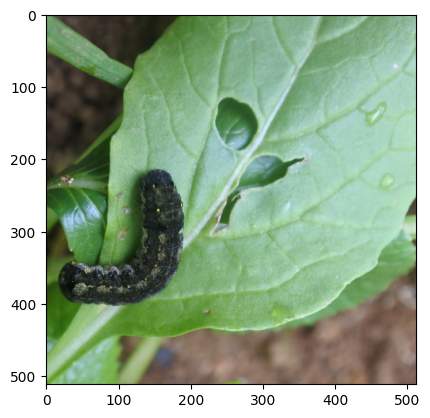

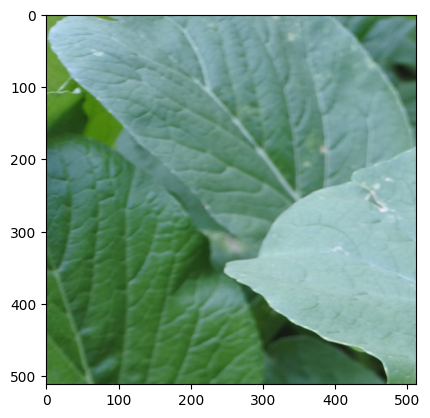

In [ ]:
# display with pest image
img = mpimg.imread(path_with_pest + '/16.png')
imgplot = plt.imshow(img)
plt.show()

# displaying without pest image
img = mpimg.imread(path_without_pest + "/16.png")
imgplot = plt.imshow(img)
plt.show()

In [ ]:
data = []
pest_files = os.listdir(path_with_pest)

for img_file in pest_files:
  image = Image.open(path_with_pest + "/" + str(img_file))
  image = image.resize((128,128))
  image = image.convert('RGB')
  image =  np.array(image)
  data.append(image)

In [ ]:
nopest_files = os.listdir(path_without_pest)

for img_file in nopest_files:
  image = Image.open(path_without_pest + '/' + str(img_file))
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

type(data), len(data)
data[0]

# converting image list and label list to numpy arrays
x = np.array(data)
y = np.array(labels)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x.shape, x_train.shape, x_test.shape)

(199, 128, 128, 3) (159, 128, 128, 3) (40, 128, 128, 3)


In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255
x_train[0],x_train_scaled[0]

(array([[[ 16,  21,  15],
         [ 14,  19,  13],
         [ 14,  20,  13],
         ...,
         [173, 212, 185],
         [172, 210, 185],
         [170, 208, 183]],
 
        [[ 19,  24,  18],
         [ 17,  23,  17],
         [ 16,  23,  18],
         ...,
         [172, 209, 185],
         [172, 210, 185],
         [173, 210, 186]],
 
        [[ 24,  29,  23],
         [ 24,  29,  24],
         [ 17,  24,  21],
         ...,
         [168, 207, 184],
         [170, 210, 186],
         [172, 211, 188]],
 
        ...,
 
        [[152, 192, 188],
         [149, 189, 187],
         [146, 186, 185],
         ...,
         [137, 178, 163],
         [142, 183, 168],
         [146, 187, 171]],
 
        [[154, 193, 190],
         [156, 194, 193],
         [153, 193, 192],
         ...,
         [137, 177, 162],
         [142, 181, 164],
         [146, 185, 167]],
 
        [[157, 196, 194],
         [157, 196, 195],
         [155, 194, 193],
         ...,
         [142, 181, 164],
  

In [ ]:
num_of_classes = 2

model =  keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64, kernel_size = (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

#compile the neural network
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
#training the neural network
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=15)

Epoch 1/15
5/5 [==============================] - 3s 127ms/step - loss: 1.2684 - acc: 0.5315 - val_loss: 0.7089 - val_acc: 0.6250
Epoch 2/15
5/5 [==============================] - 0s 24ms/step - loss: 0.8292 - acc: 0.5105 - val_loss: 0.6973 - val_acc: 0.3750
Epoch 3/15
5/5 [==============================] - 0s 23ms/step - loss: 0.6897 - acc: 0.4406 - val_loss: 0.7112 - val_acc: 0.3750
Epoch 4/15
5/5 [==============================] - 0s 23ms/step - loss: 0.6686 - acc: 0.5734 - val_loss: 0.7019 - val_acc: 0.3750
Epoch 5/15
5/5 [==============================] - 0s 23ms/step - loss: 0.6734 - acc: 0.5664 - val_loss: 0.7054 - val_acc: 0.3750
Epoch 6/15
5/5 [==============================] - 0s 23ms/step - loss: 0.6370 - acc: 0.6364 - val_loss: 0.8360 - val_acc: 0.3750
Epoch 7/15
5/5 [==============================] - 0s 25ms/step - loss: 0.6486 - acc: 0.6154 - val_loss: 0.6495 - val_acc: 0.6875
Epoch 8/15
5/5 [==============================] - 0s 25ms/step - loss: 0.5760 - acc: 0.7343 - va

In [ ]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

2/2 [==============================] - 0s 52ms/step - loss: 0.5837 - acc: 0.7250
Test Accuracy = 0.7250000238418579


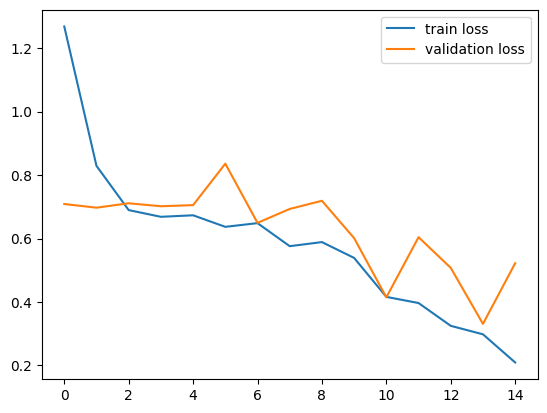

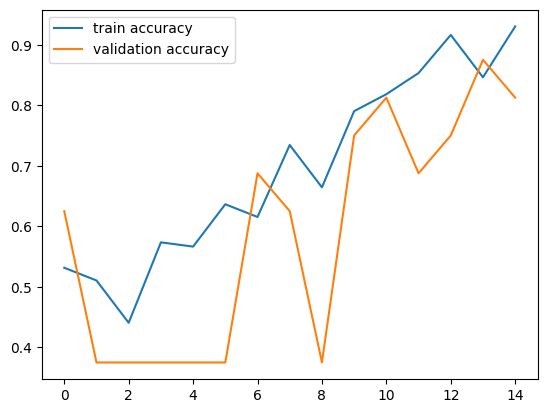

In [ ]:
h = history
# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

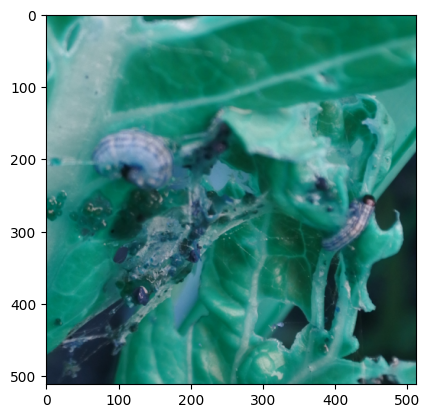

1/1 [==============================] - 0s 121ms/step
[[0.01496612 0.9099409 ]]
1
The leaves in the picture are affected by pests


In [ ]:
#input_image_path = input('Path of the image to be predicted: ')
input_image_path = path_with_pest + '/1.png'
input_image = cv2.imread(input_image_path)

imgplat = plt.imshow(input_image)
plt.show()

input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
    print('The leaves in the picture are affected by pests')
else:
    print('The leaves in the picture are not affected by pests')

In [ ]:
import tensorflow_hub as hub

mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(128, 128, 3), trainable=False)
model = tf.keras.Sequential([tf.keras.layers.InputLayer(input_shape=(128, 128, 3)), tf.keras.layers.Lambda( lambda x: tf.image.resize(x, (224, 224))),
        pretrained_model, tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 224, 224, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense_5 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
      optimizer = 'adam',
      loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['acc']
)
model.fit(x_train_scaled, y_train, epochs=15)

Epoch 1/15
5/5 [==============================] - 6s 160ms/step - loss: 0.5614 - acc: 0.7170
Epoch 2/15
5/5 [==============================] - 0s 39ms/step - loss: 0.2977 - acc: 0.8931
Epoch 3/15
5/5 [==============================] - 0s 39ms/step - loss: 0.1829 - acc: 0.9686
Epoch 4/15
5/5 [==============================] - 0s 39ms/step - loss: 0.1239 - acc: 0.9874
Epoch 5/15
5/5 [==============================] - 0s 40ms/step - loss: 0.0948 - acc: 0.9874
Epoch 6/15
5/5 [==============================] - 0s 39ms/step - loss: 0.0765 - acc: 0.9937
Epoch 7/15
5/5 [==============================] - 0s 39ms/step - loss: 0.0634 - acc: 0.9937
Epoch 8/15
5/5 [==============================] - 0s 40ms/step - loss: 0.0533 - acc: 0.9937
Epoch 9/15
5/5 [==============================] - 0s 39ms/step - loss: 0.0467 - acc: 0.9937
Epoch 10/15
5/5 [==============================] - 0s 39ms/step - loss: 0.0408 - acc: 0.9937
Epoch 11/15
5/5 [==============================] - 0s 39ms/step - loss: 0.0367

In [ ]:
score, acc = model.evaluate(x_test_scaled, y_test)
print(f'Test Loss = {score}')
print(f'Test Accuracy = {acc}')

2/2 [==============================] - 1s 352ms/step - loss: 0.0711 - acc: 0.9750
Test Loss = 0.07105690985918045
Test Accuracy = 0.9750000238418579


### Analisis
> Dapat dilihat berdasarkan data yang telah kita salin path dari google drive, ada 2 yaitu data terkena hama dan tidak terkena hama. Lalu terdapat 99 gambar terkena hama dan 100 gambar yang tidak terkena hama, yang terkena hama didefinisikan dengan 1 dan yang tidak terkena hama didefinisikan dengan 0. Total data gambar yaitu 199 gambar. Setelah dilakukan pengecekan data, tampilkan 2 gambar yang mana, 1 gambar merupakan gambar dengan sawi yang terkena hama yaitu pada file 16.png dan 1 gambar lain nya merupakan gambar dengan sawi yang tidak terkena hama yaitu pada file 16.png. Setelah dilakukan perhitungan, perulangan dan convert gambar ke numpy array. Selanjutnya didapatkan ukuran data train dan data test. Setelah itu didapatkan hasil scaled dari kedua data tersebut yang dibagi dengan 255 (Sudah ketentuan RGB).  

> Bangun model CNN dengan jumlah kelas = 5 dan masukkan layer yang berada pada arsitektur CNN. Compile model tersebut lalu lakukan pengujian dengan epochs sebanyak 15. Lalu didapatkan hasil akurasi sebesar 0.7250000238418579. Setelah itu kita tampillkan plot loss dan accuracy value. Pada plot pertama didapatkan hasil bahwa train loss menurun cukup signifikan dibandingkan dnegan validation accuracy nya. Sedangkan untuk plot yang kedua didapatkan hasil bahwa train accuracy menaik cukup signifikan bersamaan dengan validation accuracy nya.

> Lanjut kita prediksi sebuah gambar dengan file 1.png, yang mana memiliki hasil dengan prediksi bahwa Sawi Terkena Hama. Dan jika dilihat output gambar adalah benar jika sawi tersebut terkena hama. Selanjutnya hasil tes akurasi akan keluar dengan keterangan ukuran sebesar 224x224 dengan RGB. Layer yang digunakan yaitu 1280 layer. Hasil dense yaitu sebesar 2 yang menunjuukan jumlah klasifikasi nya. Param dapat digunakan untuk perhitungan, untuk param trainable merupakan nilai bobot yang bisa berubah namun non-trainable tidak dapat diubah.

> Yang terakhir adalah skor akurasi yang didapat yaitu nilai Test Loss = 0.07105690985918045 dan nilai Test Accuracy = 0.9750000238418579. Nilai akurasi nya dapat dibilang tinggi.

### Flowchart
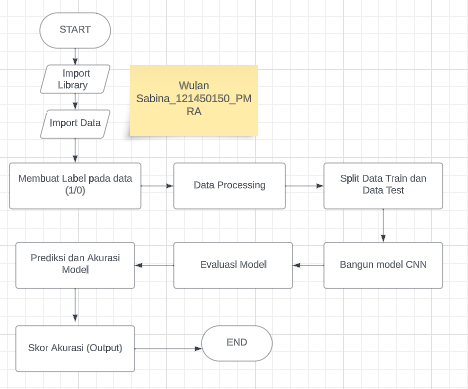

### Pseudocode
````
MULAI

Convolutinal Neural Network <- Judul

IMPORT -> Library
os
numpy
matplotlib
cv2
PIL
sklearn.model
tensorflow
google.colab

INPUT -> Data
Path Google Drive (/content/drive/MyDrive/SAWI/)
READ -> Data

INISIALISASI -> Label Data
pest_files
nopest_files
(akan mengeluarkan output 1 jika terkena hama dan output 0 jika tidak terkena hama)
OUTPUT ->
Gambar dengan Sawi Terkena Hama
Gambar dengan Sawi Tidak Terkena Hama

INISIALISASI -> Data Processing
data = []

FOR file gambar di dalam file hama
(berisikan pembacaan data, resize, cover array, dan data ditambahkan)
FOR file gambar di dalam file tidak ada hama
(berisikan pembacaan data, resize, cover array, dan data ditambahkan)

data[0]

INISIALISASI -> Split Data Train dan Data Tx_train
x_test
y_train
y_test
(akan dilakukan test_size sebesar 0.2 dan random_state = 42)
OUTPUT -> Ukuran Data Train dan Data Test.

INISIALISASI -> Model CNN
jumlah kelas = 2
model
(berisikan layer yang terdapat pada CNN yaitu Conv, Flatten, Dense, dsb)
Compile Model
Latih Model

INISIALISASI -> Evaluasi Model
loss
accuracy
OUTPUT -> Akurasi Pengujian (accuracy)
OUTPUT ->
Plot Loss Value
Plot Acccuracy Value

INISIALISASI -> Prediksi
input_image_path
(dimasukkan path 1.png)
OUTPUT -> Plot hasil Prediksi
(terdapat prediksi, dan prediksi label nya)
OUTPUT -> Hasil Prediksi (Terkena Hama(1)/ Tidak(0))

SELESAI
````

## CNN (TRAIN)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path_with_pest = '/content/drive/MyDrive/SAWI/train/Data Sawi Ada Hama'
path_without_pest = '/content/drive/MyDrive/SAWI/train/Data Sawi Tanpa Hama'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load data files
pest_files = os.listdir(path_with_pest)
print(pest_files[0:5])
print(pest_files[-5:])

nopest_files = os.listdir(path_without_pest)
print(nopest_files[0:5])
print(nopest_files[-5:])

print(f'Number of with pest images: {len(pest_files)}')
print(f'Number of without pest images: {len(nopest_files)})')

['192.png', '190.png', '19.png', '191.png', '234.png']
['84.png', '55.png', '85.png', '96.png', '68.png']
['193.png', '195.png', '19.png', '191.png', '190.png']
['77.png', '9.png', '99.png', '8.png', '61.png']
Number of with pest images: 400
Number of without pest images: 400)


In [ ]:
pest_files = [1]*len(pest_files)
nopest_files = [0]*len (nopest_files)
print(pest_files[0:5]),print(nopest_files[0:5])
print(len(pest_files)),print(len(nopest_files))

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
400
400


(None, None)

In [ ]:
labels = pest_files + nopest_files
print(len(labels))
print(labels [0:5])
print(labels[-5:])

800
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


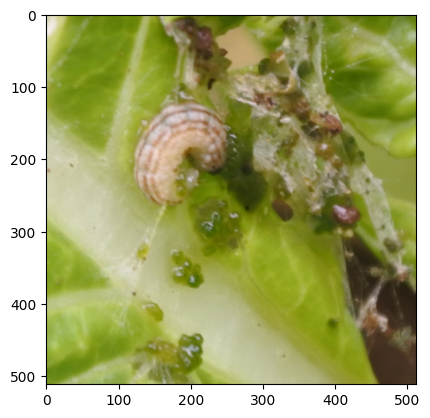

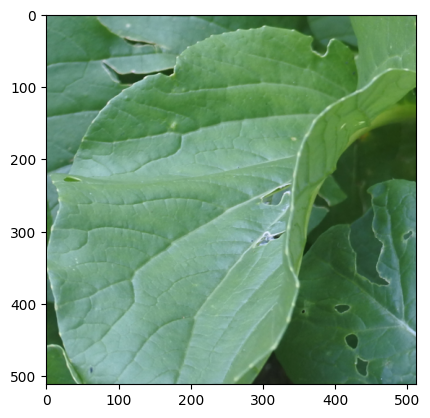

In [ ]:
# display with pest image
img = mpimg.imread(path_with_pest + '/2.png')
imgplot = plt.imshow(img)
plt.show()

# displaying without pest image
img = mpimg.imread(path_without_pest + "/2.png")
imgplot = plt.imshow(img)
plt.show()

In [ ]:
data = []
pest_files = os.listdir(path_with_pest)

for img_file in pest_files:
  image = Image.open(path_with_pest + "/" + str(img_file))
  image = image.resize((128,128))
  image = image.convert('RGB')
  image =  np.array(image)
  data.append(image)

In [ ]:
nopest_files = os.listdir(path_without_pest)

for img_file in nopest_files:
  image = Image.open(path_without_pest + '/' + str(img_file))
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

type(data), len(data)
data[0]

# converting image list and label list to numpy arrays
x = np.array(data)
y = np.array(labels)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x.shape, x_train.shape, x_test.shape)

(800, 128, 128, 3) (640, 128, 128, 3) (160, 128, 128, 3)


In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255
x_train[0],x_train_scaled[0]

(array([[[111, 153,  67],
         [111, 153,  67],
         [110, 152,  67],
         ...,
         [144, 184,  95],
         [144, 184,  95],
         [140, 181,  89]],
 
        [[110, 153,  67],
         [108, 151,  65],
         [105, 149,  64],
         ...,
         [142, 182,  95],
         [144, 184,  96],
         [140, 180,  90]],
 
        [[106, 151,  63],
         [104, 149,  63],
         [105, 148,  65],
         ...,
         [146, 185, 101],
         [146, 185, 103],
         [143, 182,  97]],
 
        ...,
 
        [[130, 173,  91],
         [130, 173,  91],
         [129, 172,  90],
         ...,
         [158, 193, 109],
         [156, 191, 107],
         [149, 186,  99]],
 
        [[130, 173,  91],
         [130, 173,  91],
         [130, 173,  91],
         ...,
         [157, 192, 107],
         [154, 189, 103],
         [150, 186,  98]],
 
        [[129, 173,  89],
         [130, 174,  91],
         [131, 174,  92],
         ...,
         [156, 192, 105],
  

In [ ]:
num_of_classes = 2

model =  keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64, kernel_size = (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

#compile the neural network
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
#training the neural network
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=15)

Epoch 1/15
18/18 [==============================] - 3s 41ms/step - loss: 0.9111 - acc: 0.5538 - val_loss: 0.5285 - val_acc: 0.7031
Epoch 2/15
18/18 [==============================] - 0s 25ms/step - loss: 0.4537 - acc: 0.7743 - val_loss: 0.5489 - val_acc: 0.7188
Epoch 3/15
18/18 [==============================] - 0s 23ms/step - loss: 0.4334 - acc: 0.8264 - val_loss: 0.4670 - val_acc: 0.7812
Epoch 4/15
18/18 [==============================] - 0s 21ms/step - loss: 0.4013 - acc: 0.8229 - val_loss: 0.6738 - val_acc: 0.7344
Epoch 5/15
18/18 [==============================] - 0s 21ms/step - loss: 0.3972 - acc: 0.8316 - val_loss: 0.3956 - val_acc: 0.7812
Epoch 6/15
18/18 [==============================] - 0s 21ms/step - loss: 0.3460 - acc: 0.8559 - val_loss: 0.4653 - val_acc: 0.8281
Epoch 7/15
18/18 [==============================] - 0s 24ms/step - loss: 0.3246 - acc: 0.8472 - val_loss: 0.3350 - val_acc: 0.7812
Epoch 8/15
18/18 [==============================] - 0s 21ms/step - loss: 0.2497 - a

In [ ]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

5/5 [==============================] - 0s 23ms/step - loss: 0.2543 - acc: 0.9062
Test Accuracy = 0.90625


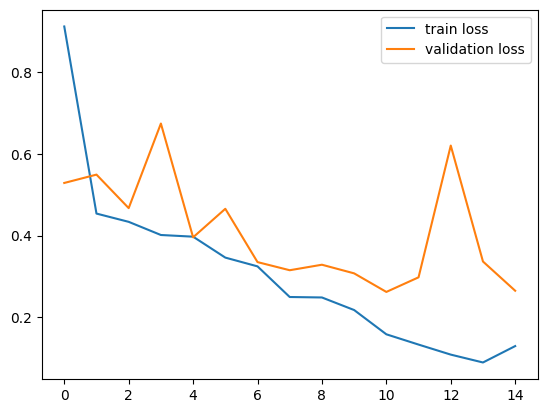

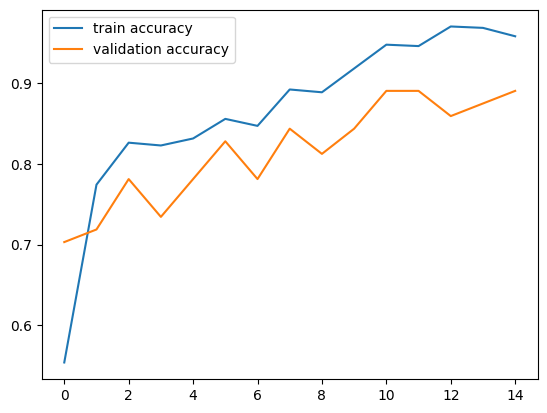

In [ ]:
h = history
# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

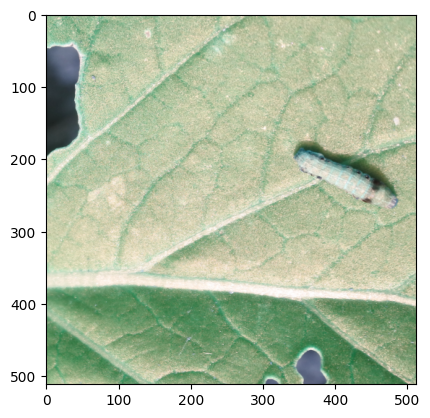

1/1 [==============================] - 0s 61ms/step
[[0.00251171 0.99518687]]
1
The leaves in the picture are affected by pests


In [ ]:
#input_image_path = input('Path of the image to be predicted: ')
input_image_path = path_with_pest + '/190.png'
input_image = cv2.imread(input_image_path)

imgplat = plt.imshow(input_image)
plt.show()

input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
    print('The leaves in the picture are affected by pests')
else:
    print('The leaves in the picture are not affected by pests')

In [ ]:
import tensorflow_hub as hub

mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(128, 128, 3), trainable=False)
model = tf.keras.Sequential([tf.keras.layers.InputLayer(input_shape=(128, 128, 3)), tf.keras.layers.Lambda( lambda x: tf.image.resize(x, (224, 224))),
        pretrained_model, tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 224, 224, 3)       0         
                                                                 
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_9 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
      optimizer = 'adam',
      loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['acc']
)
model.fit(x_train_scaled, y_train, epochs=15)

Epoch 1/15
20/20 [==============================] - 8s 39ms/step - loss: 0.2845 - acc: 0.8984
Epoch 2/15
20/20 [==============================] - 1s 37ms/step - loss: 0.1043 - acc: 0.9688
Epoch 3/15
20/20 [==============================] - 1s 38ms/step - loss: 0.0706 - acc: 0.9828
Epoch 4/15
20/20 [==============================] - 1s 38ms/step - loss: 0.0531 - acc: 0.9875
Epoch 5/15
20/20 [==============================] - 1s 38ms/step - loss: 0.0411 - acc: 0.9922
Epoch 6/15
20/20 [==============================] - 1s 38ms/step - loss: 0.0357 - acc: 0.9937
Epoch 7/15
20/20 [==============================] - 1s 37ms/step - loss: 0.0302 - acc: 0.9969
Epoch 8/15
20/20 [==============================] - 1s 38ms/step - loss: 0.0255 - acc: 0.9969
Epoch 9/15
20/20 [==============================] - 1s 38ms/step - loss: 0.0214 - acc: 0.9969
Epoch 10/15
20/20 [==============================] - 1s 37ms/step - loss: 0.0192 - acc: 0.9984
Epoch 11/15
20/20 [==============================] - 1s 38m

In [ ]:
score, acc = model.evaluate(x_test_scaled, y_test)
print(f'Test Loss = {score}')
print(f'Test Accuracy = {acc}')

5/5 [==============================] - 1s 49ms/step - loss: 0.0504 - acc: 0.9750
Test Loss = 0.050390779972076416
Test Accuracy = 0.9750000238418579


### Analisis
> Dapat dilihat berdasarkan data yang telah kita salin path dari google drive, ada 2 yaitu data terkena hama dan tidak terkena hama. Lalu terdapat 400 gambar terkena hama dan 400 gambar yang tidak terkena hama, yang terkena hama didefinisikan dengan 1 dan yang tidak terkena hama didefinisikan dengan 0. Total data gambar yaitu 800 gambar. Setelah dilakukan pengecekan data, tampilkan 2 gambar yang mana, 1 gambar merupakan gambar dengan sawi yang terkena hama yaitu pada file 2.png dan 1 gambar lain nya merupakan gambar dengan sawi yang tidak terkena hama yaitu pada file 2.png. Setelah dilakukan perhitungan, perulangan dan convert gambar ke numpy array. Selanjutnya didapatkan ukuran data train dan data test. Setelah itu didapatkan hasil scaled dari kedua data tersebut yang dibagi dengan 255 (Sudah ketentuan RGB).  

> Bangun model CNN dengan jumlah kelas = 2 dan masukkan layer yang berada pada arsitektur CNN. Compile model tersebut lalu lakukan pengujian dengan epochs sebanyak 15. Lalu didapatkan hasil akurasi sebesar 0.90625. Setelah itu kita tampillkan plot loss dan accuracy value. Pada plot pertama didapatkan hasil bahwa train loss menurun cukup signifikan dibandingkan dnegan validation accuracy nya terdapat kenaikan pada 12. Sedangkan untuk plot yang kedua didapatkan hasil bahwa train accuracy menaik cukup signifikan bersamaan dengan validation accuracy nya.

> Lanjut kita prediksi sebuah gambar dengan file 190.png, yang mana memiliki hasil dengan prediksi bahwa Sawi Terkena Hama. Dan jika dilihat output gambar adalah benar jika sawi tersebut terkena hama. Selanjutnya hasil tes akurasi akan keluar dengan keterangan ukuran sebesar 224x224 dengan RGB. Layer yang digunakan yaitu 1280 layer. Hasil dense yaitu sebesar 2 yang menunjuukan jumlah klasifikasi nya. Param dapat digunakan untuk perhitungan, untuk param trainable merupakan nilai bobot yang bisa berubah namun non-trainable tidak dapat diubah.

> Yang terakhir adalah skor akurasi yang didapat yaitu nilai Test Loss = 0.050390779972076416 dan nilai Test Accuracy = 0.9750000238418579. Nilai akurasi nya dapat dibilang tinggi.

> Kesimpulan nya ialah nilai test akurasi yang didapat dari valid dan train adalah sama namun nilai test loss nya memiliki selisih yaitu sebesar 0.03085. Dengan hasil test loss pada data valid memiliki nilai yang lebih besar dibandingkan data train. Maka, model dengan data train dapat dibilang lebih baik dibandingkan data valid.